In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
        tmpdir + '/ml-1m.zip')
    zipfile.ZipFile(tmpdir + '/ml-1m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-1m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-1m/ratings.dat',
        sep='::',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-1m/users.dat',
        sep='::',
        names=['USER_ID','GENDER','AGE','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-1m/movies.dat',
        sep='::', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'GENRES'],
    )

movies.dat
ratings.dat
README
users.dat



/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warni

## run diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
        USER_ID  ITEM_ID  RATING  TIMESTAMP
300985     1786     3555       3  974700794
101841      678      736       4  989241719
505335     3108       50       5  969491979
14232       116     2021       5  978539475
290063     1733     3298       3  974761540
890763     5378     2881       3  960402117
368955     2156      532       4  974630201
269           5     2770       4  978241981
645939     3887      508       3  965805815
768429     4578      145       4  964390894

=== Interactions table, original shape=(1000209, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (1000209, 4)
duplication rate 0.0
drop_duplicates shape (1000209, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             RATING     TIMESTAMP
count  1.000209e+06  1.000209e+06
mean   3.581564e+00  9.722437e+08
std    1.117102e+00  1.2

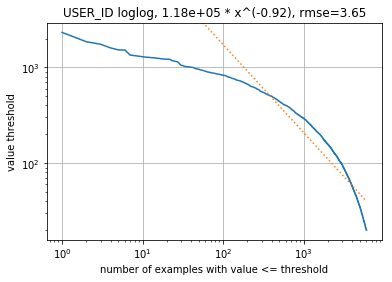


=== ITEM_ID top 10 categories ===
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64


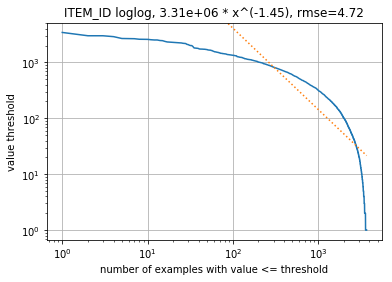


=== Hourly activity pattern ===
0     55397
1     58223
2     59068
3     62396
4     55443
5     42064
6     33987
7     27519
8     20547
9     12959
10     9370
11     8617
12    13221
13    20917
14    28865
15    40385
16    48954
17    53565
18    59138
19    59201
20    59709
21    65491
22    55098
23    50075
dtype: int64

=== Day of week activity pattern ===
0    173931
1    159272
2    141176
3    142722
4    129438
5    108692
6    144978
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


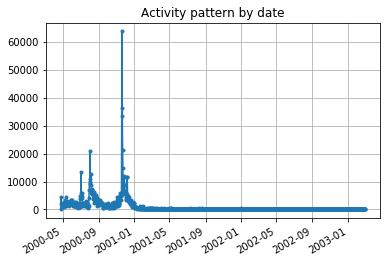

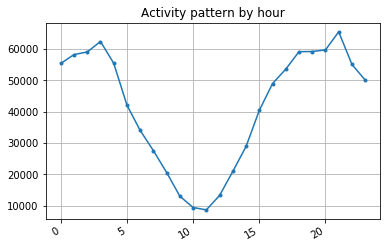

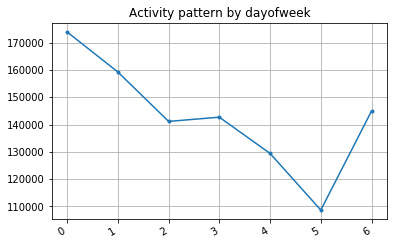


=== Temporal shift analysis ===

temporal out-sample items, freq=5d, hist_len=0, avg_loss=13.4%, time=1.3s
temporal out-sample items, freq=5d, hist_len=1, avg_loss=10.1%, time=1.0s
temporal out-sample items, freq=5d, hist_len=10, avg_loss=2.4%, time=1.1s
temporal out-sample items, freq=5d, hist_len=100, avg_loss=1.3%, time=1.0s
temporal out-sample items, freq=5d, hist_len=1000, avg_loss=1.3%, time=1.0s


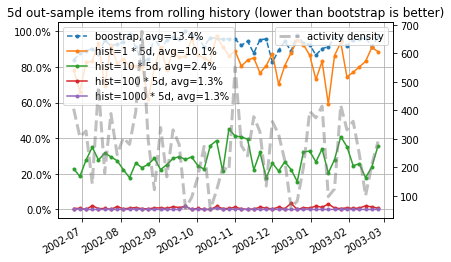

temporal total variation, freq=5d, hist_len=0, avg_loss=29.4%, time=1.2s
temporal total variation, freq=5d, hist_len=1, avg_loss=23.9%, time=1.2s
temporal total variation, freq=5d, hist_len=10, avg_loss=20.0%, time=1.1s
temporal total variation, freq=5d, hist_len=100, avg_loss=20.3%, time=1.2s
temporal total variation, freq=5d, hist_len=1000, avg_loss=20.3%, time=1.1s


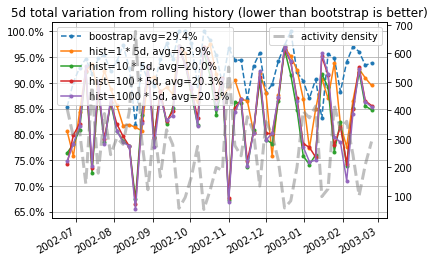

temporal out-sample items, freq=1d, hist_len=0, avg_loss=35.2%, time=1.4s
temporal out-sample items, freq=1d, hist_len=1, avg_loss=25.1%, time=1.1s
temporal out-sample items, freq=1d, hist_len=10, avg_loss=5.8%, time=1.2s
temporal out-sample items, freq=1d, hist_len=100, avg_loss=1.1%, time=1.4s
temporal out-sample items, freq=1d, hist_len=1000, avg_loss=0.6%, time=1.7s


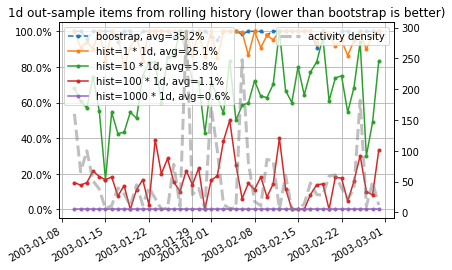

temporal total variation, freq=1d, hist_len=0, avg_loss=49.7%, time=1.3s
temporal total variation, freq=1d, hist_len=1, avg_loss=40.9%, time=1.1s
temporal total variation, freq=1d, hist_len=10, avg_loss=33.5%, time=1.1s
temporal total variation, freq=1d, hist_len=100, avg_loss=33.3%, time=1.4s
temporal total variation, freq=1d, hist_len=1000, avg_loss=33.4%, time=1.8s


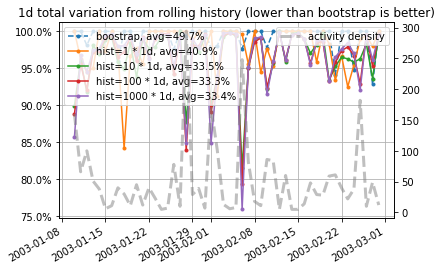

temporal out-sample items, freq=3h, hist_len=0, avg_loss=69.8%, time=1.7s
temporal out-sample items, freq=3h, hist_len=1, avg_loss=60.8%, time=1.4s
temporal out-sample items, freq=3h, hist_len=10, avg_loss=21.3%, time=1.8s
temporal out-sample items, freq=3h, hist_len=100, avg_loss=4.7%, time=3.3s
temporal out-sample items, freq=3h, hist_len=1000, avg_loss=0.7%, time=6.7s


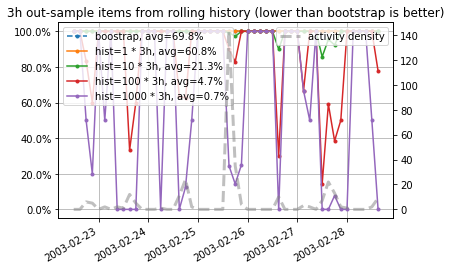

temporal total variation, freq=3h, hist_len=0, avg_loss=76.0%, time=1.7s
temporal total variation, freq=3h, hist_len=1, avg_loss=68.3%, time=1.4s
temporal total variation, freq=3h, hist_len=10, avg_loss=58.6%, time=1.8s
temporal total variation, freq=3h, hist_len=100, avg_loss=57.4%, time=3.2s
temporal total variation, freq=3h, hist_len=1000, avg_loss=57.6%, time=6.8s


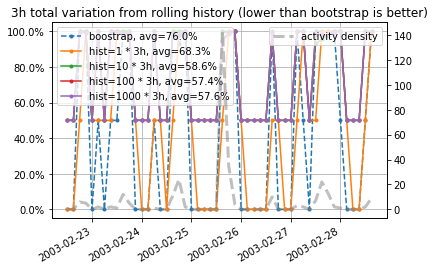


=== session time delta describe ===
count    9.941690e+05
mean     4.986574e+04
std      9.525371e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      8.892327e+07
Name: TIMESTAMP, dtype: float64


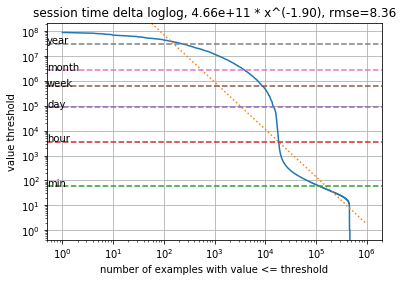

=== user time span describe ===
count    6.040000e+03
mean     8.207777e+06
std      1.917298e+07
min      1.060000e+02
25%      1.207500e+03
50%      4.068500e+03
75%      2.021375e+06
max      8.924779e+07
Name: TIMESTAMP, dtype: float64


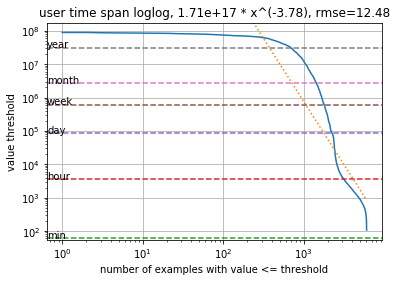

########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
      USER_ID GENDER  AGE  OCCUPATION ZIPCODE
1994     1995      M   25           1   85364
1758     1759      M   25          16   22112
1342     1343      M   35          14   91324
1957     1958      F   25           1   17055
5700     5701      M   25           7   55311
4004     4005      M   35           7   12110
438       439      M   35          14   55129
3503     3504      M   18           7   02215
5870     5871      F   25           4   01002
3170     3171      F   50           3   10128

=== Users table, original shape=(6040, 5) ===

Missing rate of all user meta-data 0.0
User coldstart rate 0.0

=== Describe  ===

               AGE   OCCUPATION
count  6040.000000  6040.000000
mean     30.639238     8.146854
std      12.895962     6.329511
min       1.000000     0.000000
25%      25.000000     3.000000
50%      25.000000     7.000000
75%      35.000000    1

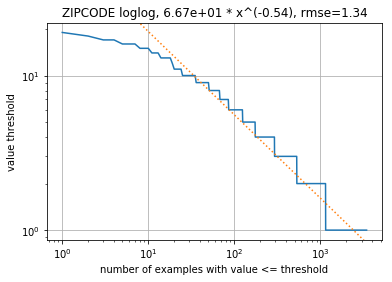

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.5392588567551565)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                          _TITLE  \
3137     3206                         Against All Odds (1984)   
3641     3710                           Action Jackson (1988)   
3330     3399  Sesame Street Presents Follow That Bird (1985)   
2423     2492                                 20 Dates (1998)   
1346     1367                           101 Dalmatians (1996)   
1108     1124                           On Golden Pond (1981)   
2436     2505                                      8MM (1999)   
2914     2983                        Ipcress File, The (1965)   
121       123                        Chungking Express (1994)   
939       951                          His Girl Friday (1940)   

                     GENRES  
3137                Romance  
3641          Action|Comedy  
3330      Children's|Comedy  
2423                 Comedy  
1346      Children

/home/yifeim/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


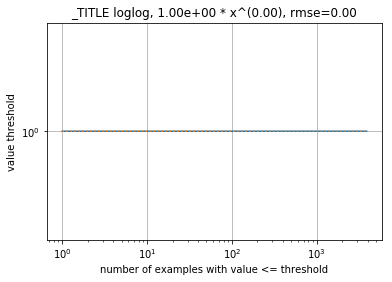


=== GENRES top 10 categories ===
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=0.0)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))


In [3]:
diagnose(interactions, users, items)